<a href="https://colab.research.google.com/github/B0829009/pa/blob/main/DEP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **connect to drive**

In [1]:
from google.colab import drive

drivePath = '/content/drive'

drive.mount(drivePath)

SyntaxError: invalid syntax (<ipython-input-1-985945873782>, line 1)

#library

In [ ]:
%reload_ext rpy2.ipython

In [ ]:
%%R
lib_loc <- "/content/drive/MyDrive/Colab_Notebooks/r_lib" #library location

In [ ]:
!apt-get update
!apt-get install r-cran-tmvtnorm


0% [Working]
            
Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]

0% [Connecting to archive.ubuntu.com (91.189.88.142)] [Connecting to security.u
0% [Connecting to archive.ubuntu.com (91.189.88.142)] [Connecting to security.u
                                                                               
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease

0% [Waiting for headers] [Connecting to security.ubuntu.com (91.189.91.38)] [Co
0% [1 InRelease gpgv 15.9 kB] [Waiting for headers] [Connecting to security.ubu
                                                                               
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]

0% [1 InRelease gpgv 15.9 kB] [3 InRelease 15.6 kB/88.7 kB 18%] [Connecting to 
                                                                               
Hit:4 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease

0% [1 InRelease gpgv 15.9 kB] [3 InRelease 15

In [ ]:
%%R
library(DEP, lib=lib_loc)
library("dplyr")
library(gridExtra,lib=lib_loc)
library(fdrtool,lib=lib_loc)
library(ggrepel,lib=lib_loc)

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: 
Attaching package: ‘gridExtra’


R[write to console]: The following object is masked from ‘package:dplyr’:

    combine


R[write to console]: Loading required package: ggplot2



#widgets

generate_checkbox(description, id)

In [ ]:
import ipywidgets as widgets

#checkbox
def generate_checkbox(description, id):
  check_box = widgets.Checkbox(
        value=False, #預設
        description=description,
        disabled=False, #愈愈
        indent=False, 
  )
  def on_checkbox_change(change):
    experimental_design.at[id, 'state'] = check_box.value
    if(check_box.value):
        experimental_design.at[id, 'label'] = df_colname[id-1]
    
    #print(check_box.value)
  display(check_box)
  check_box.observe(on_checkbox_change, names="value")


generate_text(id, placeholder)

In [ ]:
#text
def generate_text(id, placeholder):

  text = widgets.Text(
      value='',
      #placeholder=placeholder,
      description=placeholder,
      disabled=False,
      layout = widgets.Layout(height="30px", width="35%")
  )
  def on_text_change(change):
    experimental_design.at[id, placeholder] = text.value
    #print(experimental_design)

  display(text)
  text.observe(on_text_change, names="value")


generate_button(count,description)


In [ ]:
def generate_button(count,description):
  button = widgets.Button(description=description)
  output = widgets.Output()
  display(button, output)
  def on_button_clicked(b):
      with output:
          if(count):
            print("save to experimental_design.csv")
            
            temp = experimental_design[(experimental_design.state != "False")]
            temp = temp.drop("state", axis=1)
            temp.to_csv("experimental_design.csv", index=False)
          else :
              temp = experimental_design[(experimental_design.state != "False")]
              print(temp)
              generate_button(1,"check again")
  button.on_click(on_button_clicked)

#選擇檔案

In [ ]:
#上傳檔案到colab
from google.colab import files
from rpy2.robjects import r
import rpy2.robjects as robjects

file=files.upload()

if (file):
  filename = next(iter(file))
  if (filename.count(".txt") | filename.count(".csv")):  
    r = robjects.r
    r.assign('filename', filename) #將檔案名稱python -> R
  else :
    print("請再次執行此儲存格，並選擇.csv或.txt檔")
#else if ()
else:
  print("請再次執行此儲存格，並選擇一個檔案")

Saving proteinGroups_mouse_LA.txt to proteinGroups_mouse_LA.txt


#DEP data

In [ ]:
%%R
# Loading a package required for data handling
library("dplyr")
library(stringr)

# The data is provided with the package
file_type <- str_extract_all(filename,'\\b(.txt|.csv)\\b') #確認檔案為csv還是txt
if (file_type == ".csv"){
  data <- read.csv(file = filename, header=TRUE  ,fileEncoding ="UTF-8")  
}
else {
   data <- read.csv(file = filename, header=TRUE ,sep="\t" ,fileEncoding ="UTF-8") 
}

cat("file's row  column =", dim(data), "\n")
#cat("**colnames: \n")
#print(colnames(data))

if ( "Reverse" %in% names(data) ){
  data <- filter(data, Reverse != "+")  
}
if ( "Potential.contaminant" %in% names(data) ){
  data <- filter(data, Potential.contaminant != "+") 
}
# We filter for contaminant proteins and decoy database hits, which are indicated by "+" in the columns "Potential.contaminants" and "Reverse", respectively. 

#print(head(data))

file's row * column = 3920 74 
**colnames: 
 [1] "Protein.IDs"                         
 [2] "Majority.protein.IDs"                
 [3] "Peptide.counts..all."                
 [4] "Peptide.counts..razor.unique."       
 [5] "Peptide.counts..unique."             
 [6] "Protein.names"                       
 [7] "Gene.names"                          
 [8] "Fasta.headers"                       
 [9] "Number.of.proteins"                  
[10] "Peptides"                            
[11] "Razor...unique.peptides"             
[12] "Unique.peptides"                     
[13] "Sequence.coverage...."               
[14] "Unique...razor.sequence.coverage...."
[15] "Unique.sequence.coverage...."        
[16] "Mol..weight..kDa."                   
[17] "Sequence.length"                     
[18] "Sequence.lengths"                    
[19] "Fraction.average"                    
[20] "Fraction.1"                          
[21] "Fraction.2"                          
[22] "Fraction.3"               

In [ ]:
%%R
df <- data[ , grepl( "Reporter.intensity.corrected" , names( data) )] 
conditionColumn <- colnames(df)
print(conditionColumn)
condition <- gsub("Reporter.intensity.corrected.[0-9]+.", "", conditionColumn)
condition <- unique(condition)
print(condition)

numCondition <- length(condition)
print(numCondition)


In [ ]:
%%R
cat("condition: ", conditionName)

df <- data[ , grepl( "Reporter.intensity.corrected" , names( data) )]
df <- df[, grepl(conditionName, names(df))]

df = log2(df)
colname <- colnames(df)
numColname <- length(colname)

draw_hist <- function(id) {
  hist(x=df[,id], 
      breaks=25,
      xlim=c(0,max(df)),
      main=colname[id], # 圖片的名稱
      xlab="", 
      ylab=""
      )
}

#experimental_design

Checkbox(value=False, description='Reporter.intensity.corrected.1', indent=False)

Text(value='', description='condition', layout=Layout(height='30px', width='35%'))

Text(value='', description='replicate', layout=Layout(height='30px', width='35%'))

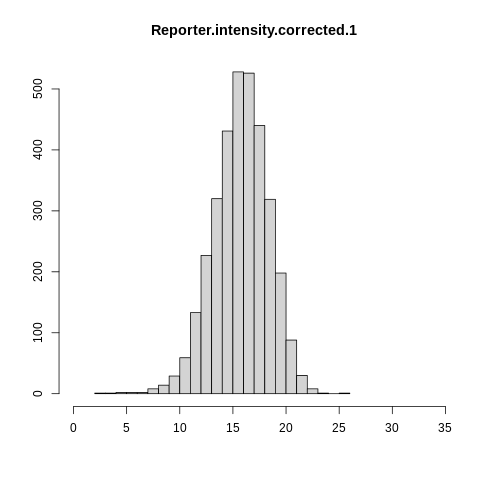

Checkbox(value=False, description='Reporter.intensity.corrected.2', indent=False)

Text(value='', description='condition', layout=Layout(height='30px', width='35%'))

Text(value='', description='replicate', layout=Layout(height='30px', width='35%'))

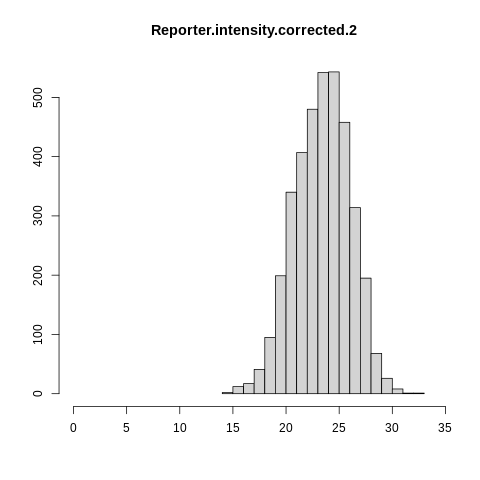

Checkbox(value=False, description='Reporter.intensity.corrected.3', indent=False)

Text(value='', description='condition', layout=Layout(height='30px', width='35%'))

Text(value='', description='replicate', layout=Layout(height='30px', width='35%'))

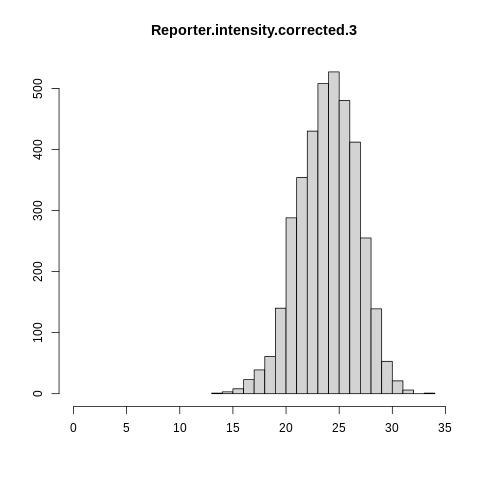

Checkbox(value=False, description='Reporter.intensity.corrected.4', indent=False)

Text(value='', description='condition', layout=Layout(height='30px', width='35%'))

Text(value='', description='replicate', layout=Layout(height='30px', width='35%'))

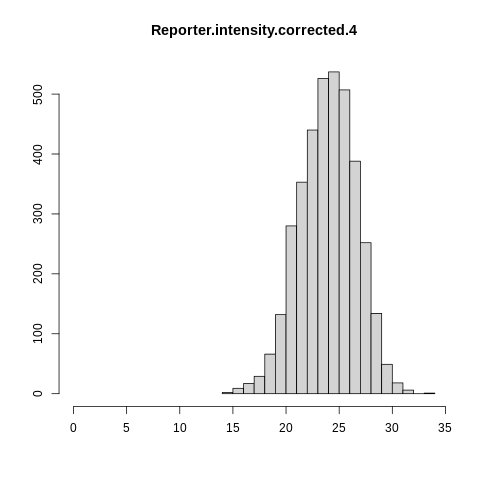

Checkbox(value=False, description='Reporter.intensity.corrected.5', indent=False)

Text(value='', description='condition', layout=Layout(height='30px', width='35%'))

Text(value='', description='replicate', layout=Layout(height='30px', width='35%'))

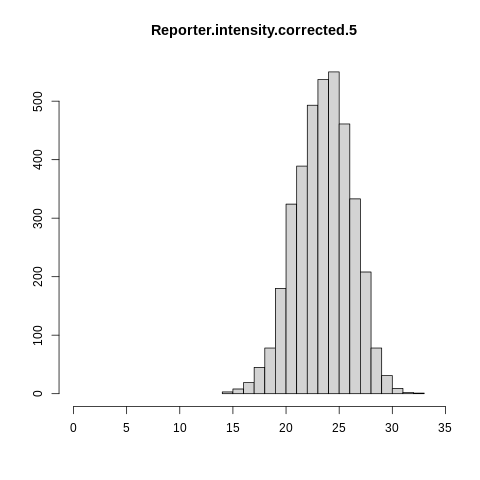

Checkbox(value=False, description='Reporter.intensity.corrected.6', indent=False)

Text(value='', description='condition', layout=Layout(height='30px', width='35%'))

Text(value='', description='replicate', layout=Layout(height='30px', width='35%'))

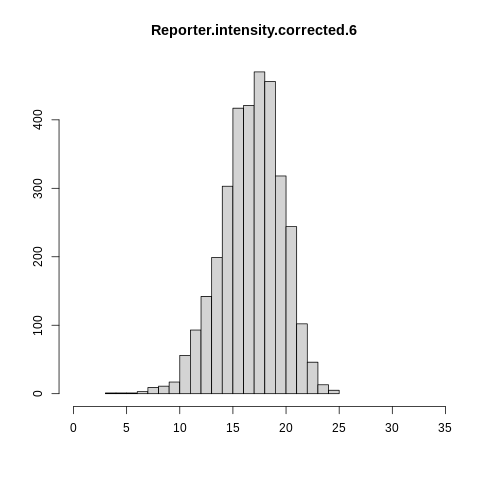

Checkbox(value=False, description='Reporter.intensity.corrected.7', indent=False)

Text(value='', description='condition', layout=Layout(height='30px', width='35%'))

Text(value='', description='replicate', layout=Layout(height='30px', width='35%'))

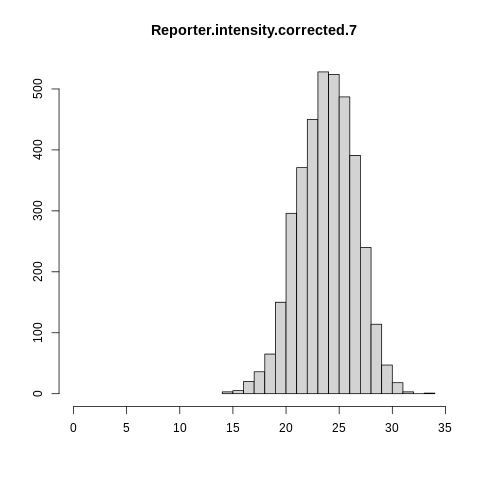

Checkbox(value=False, description='Reporter.intensity.corrected.8', indent=False)

Text(value='', description='condition', layout=Layout(height='30px', width='35%'))

Text(value='', description='replicate', layout=Layout(height='30px', width='35%'))

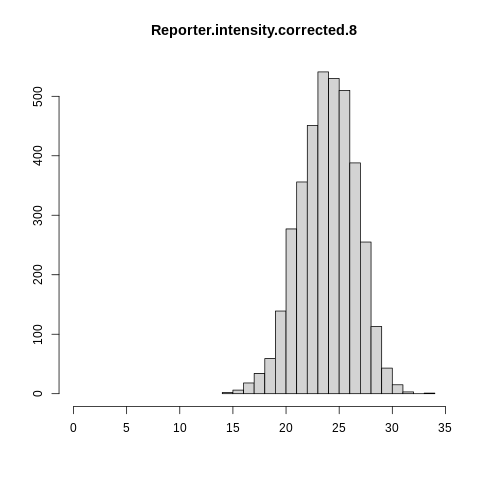

Checkbox(value=False, description='Reporter.intensity.corrected.9', indent=False)

Text(value='', description='condition', layout=Layout(height='30px', width='35%'))

Text(value='', description='replicate', layout=Layout(height='30px', width='35%'))

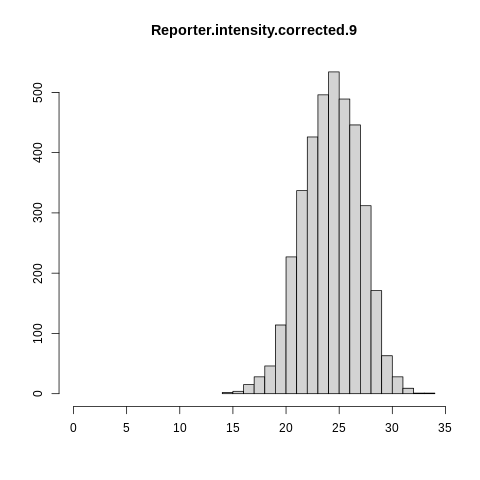

Checkbox(value=False, description='Reporter.intensity.corrected.10', indent=False)

Text(value='', description='condition', layout=Layout(height='30px', width='35%'))

Text(value='', description='replicate', layout=Layout(height='30px', width='35%'))

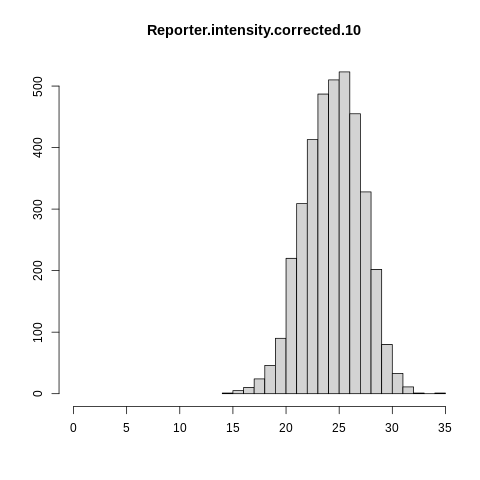

Button(description='OK', style=ButtonStyle())

Output()

In [ ]:
import pandas as pd
df_colname_py = robjects.r('colname')
df_ncol_py = robjects.r('numColname')
experimental_design = pd.DataFrame(columns=['state','label','condition','replicate'], index=range(10)).fillna("False")


for i in range(0,df_ncol_py[0]):  
  generate_checkbox(df_colname_py[i], i+1)
  generate_text(i+1,"condition")
  generate_text(i+1,"replicate")
  r.assign('id', i+1) #將檔案名稱python -> R
  %R draw_hist(id)

generate_button(0, "OK")

#make se

In [ ]:
%%R
# Are there any duplicated gene names?
cat('Are there any duplicated gene names? ', data$Gene.names %>% duplicated() %>% any(), "\n")

if ( data$Gene.names %>% duplicated() %>% any() ){
   # Make a table of duplicated gene names
  print(data %>% group_by(Gene.names) %>% summarize(frequency = n()) %>% 
    arrange(desc(frequency)) %>% filter(frequency > 1))
  
  
}
# Make unique names using the annotation in the "Gene.names" column as primary names and the annotation in "Protein.IDs" as name for those that do not have an gene name.
data_unique <- make_unique(data, "Gene.names", "Protein.IDs", delim = ";")


Are there any duplicated gene names?  TRUE 
# A tibble: 21 × 2
   Gene.names frequency
   <chr>          <int>
 1 ""                42
 2 "Cav1"             2
 3 "Cnbp"             2
 4 "Cux1"             2
 5 "Eef1d"            2
 6 "H2-K1"            2
 7 "Hmga1"            2
 8 "Hnrnpa3"          2
 9 "Hnrnpk"           2
10 "Ikbip"            2
# … with 11 more rows


In [ ]:
%%R
# Generate a SummarizedExperiment object using an experimental design
LFQ_columns <- grep("Reporter.intensity.corrected.", colnames(data_unique)) # get LFQ column numbers

#experimental_design <- UbiLength_ExpDesign
experimental_design <- read.csv('/content/experimental_design.csv',header=TRUE ,fileEncoding ="UTF-8")
experimental_design$label = gsub(" ", ".", experimental_design$label)

data_se <- make_se(data_unique, LFQ_columns, experimental_design)
# Generate a SummarizedExperiment object by parsing condition information from the column names
LFQ_columns <- grep("Reporter.intensity.corrected.", colnames(data_unique)) # get LFQ column numbers
data_se_parsed <- make_se_parse(data_unique, LFQ_columns)

# Let's have a look at the SummarizedExperiment object
data_se

class: SummarizedExperiment 
dim: 3818 8 
metadata(0):
assays(1): ''
rownames(3818): Cul4b L3mbtl1 ... Sart1 Itpr2
rowData names(66): Protein.IDs Majority.protein.IDs ... name ID
colnames(8): DMSO_1 DMSO_2 ... LA_3 LA_4
colData names(4): label ID condition replicate


#10 Filter on missing values 

In [ ]:
%%R
plot_frequency(data_se, plot= FALSE)

  samples proteins
1       0       69
2       6        1
3       7        9
4       8     3739


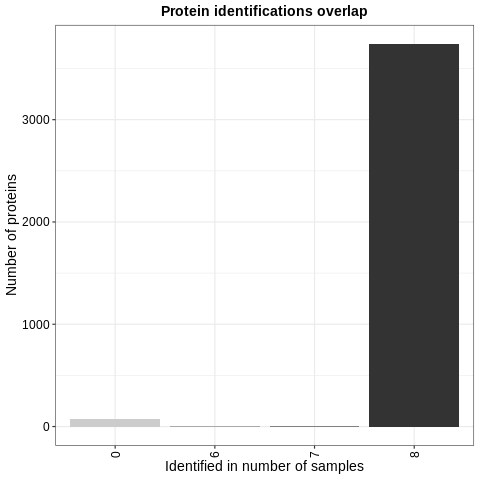

In [ ]:
%%R
# Plot a barplot of the protein identification overlap between samples
pic10_1 <- plot_frequency(data_se, plot= TRUE)
print(pic10_1)

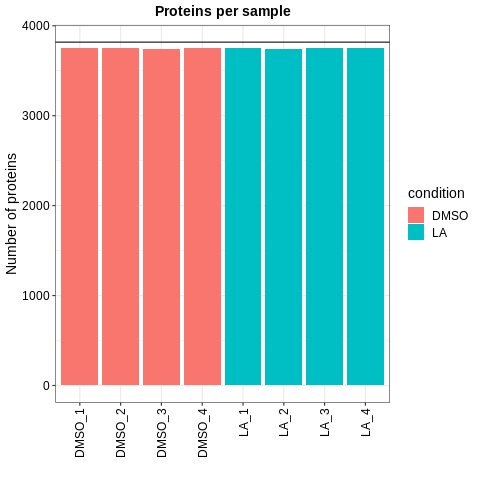

In [ ]:
%%R
# Filter for proteins that are identified in all replicates of at least one condition
data_filt <- filter_missval(data_se, thr = 4) #讓使用者選0~4(重複)

# Less stringent filtering:
# Filter for proteins that are identified in 2 out of 3 replicates of at least one condition
data_filt2 <- filter_missval(data_se, thr = 1)

# Plot a barplot of the number of identified proteins per samples
pic10_2 <- plot_numbers(data_filt, plot=TRUE)
print(pic10_2)

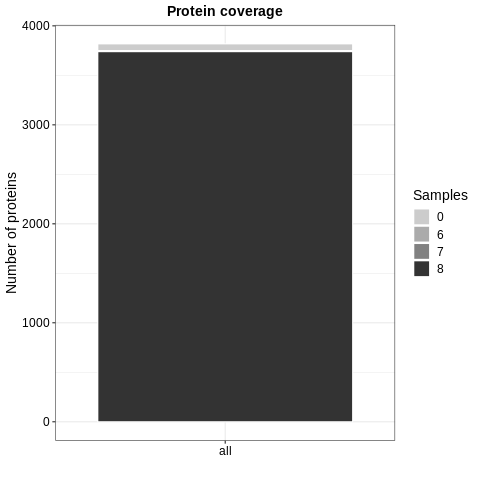

In [ ]:
%%R
# Plot a barplot of the protein identification overlap between samples
pic10_3 <- plot_coverage(data_filt)
print(pic10_3)

#11 Normalization 

In [ ]:
%%R
# Normalize the data
data_norm <- normalize_vsn(data_filt)

R[write to console]: vsn2: 3818 x 8 matrix (1 stratum). 

R[write to console]: Please use 'meanSdPlot' to verify the fit.



R[write to console]: vsn2: 3818 x 8 matrix (1 stratum). 

R[write to console]: Please use 'meanSdPlot' to verify the fit.



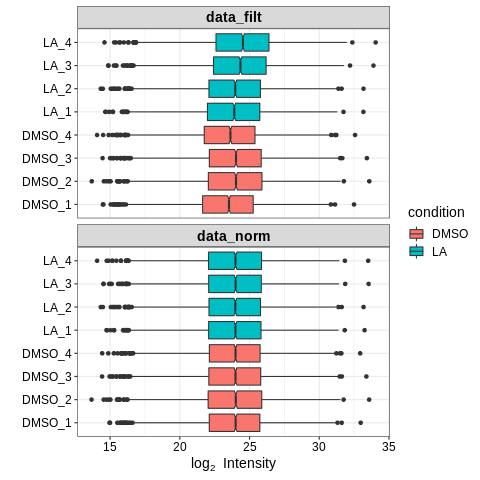

In [ ]:
%%R
# Normalize the data
data_norm <- normalize_vsn(data_filt)

# Visualize normalization by boxplots for all samples before and after normalization
pic11_1 <- plot_normalization(data_filt, data_norm)
print(pic11_1)

#12 Impute data for missing values 

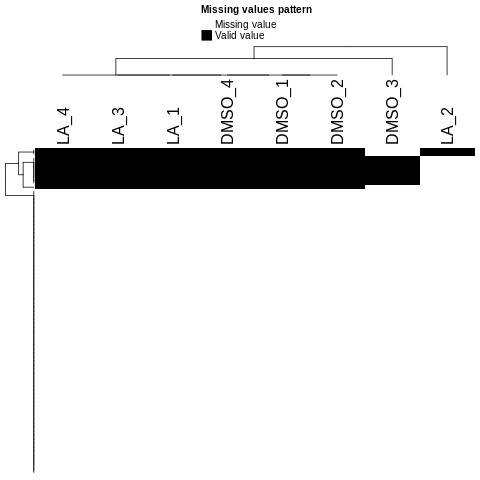

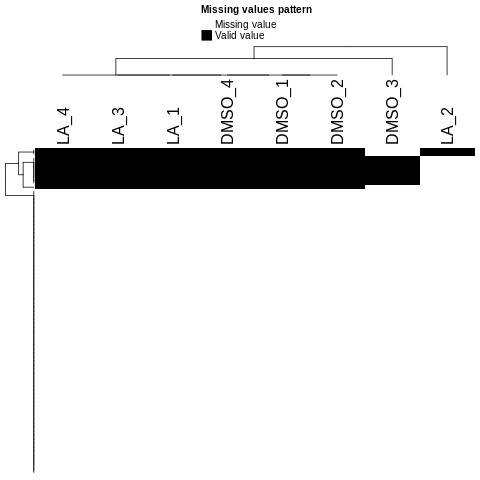

In [ ]:
%%R
# Plot a heatmap of proteins with missing values
pic12_1 <- plot_missval(data_filt)
print(pic12_1)

TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (2-2,1-1) arrange gtable[layout]


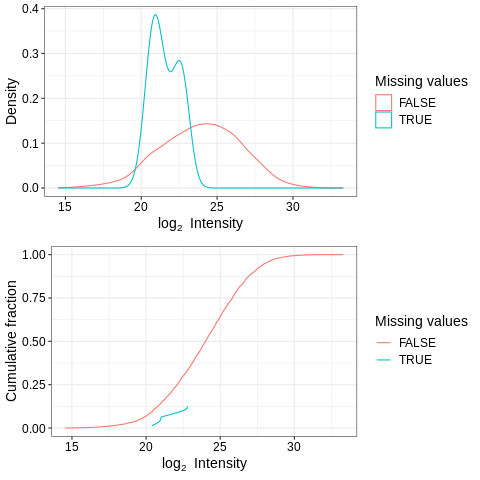

In [ ]:
%%R
# Plot intensity distributions and cumulative fraction of proteins with and without missing values
pic12_2 <- plot_detect(data_filt)
print(pic12_2)

[1] 0.1109143
Cluster size 3749 broken into 1950 1799 
Cluster size 1950 broken into 1224 726 
Done cluster 1224 
Done cluster 726 
Done cluster 1950 
Cluster size 1799 broken into 1138 661 
Done cluster 1138 
Done cluster 661 
Done cluster 1799 


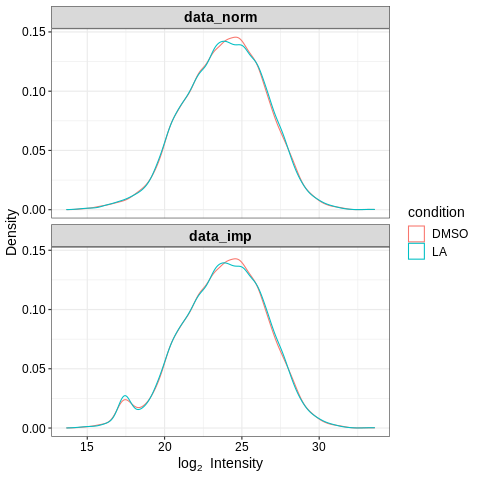

In [ ]:
%%R
# All possible imputation methods are printed in an error, if an invalid function name is given.
#impute(data_norm, fun = "")

# Impute missing data using random draws from a Gaussian distribution centered around a minimal value (for MNAR)
data_imp <- impute(data_norm, fun = "MinProb", q = 0.01)

# Impute missing data using random draws from a manually defined left-shifted Gaussian distribution (for MNAR)
data_imp_man <- impute(data_norm, fun = "man", shift = 1.8, scale = 0.3)

# Impute missing data using the k-nearest neighbour approach (for MAR)
data_imp_knn <- impute(data_norm, fun = "knn", rowmax = 0.9)

# Plot intensity distributions before and after imputation
pic12_3 <- plot_imputation(data_norm, data_imp)
print(pic12_3)

In [ ]:
%%R
# Differential enrichment analysis  based on linear models and empherical Bayes statistics

# Test every sample versus control
data_diff <- test_diff(data_imp, type = "control", control = "LA") #LA:要讓使用者可以輸入

# Test all possible comparisons of samples
data_diff_all_contrasts <- test_diff(data_imp, type = "all")


R[write to console]: Tested contrasts: DMSO_vs_LA

R[write to console]: Tested contrasts: DMSO_vs_LA



In [ ]:
%%R
# Test manually defined comparisons
data_diff_manual <- test_diff(data_imp, type = "manual", #manual() 兩個
                              test = c("DMSO_vs_LA"))  #要讓使用者可以輸入 conditionA*conditionB ()
data_diff_manual

R[write to console]: Tested contrasts: DMSO_vs_LA



class: SummarizedExperiment 
dim: 3818 8 
metadata(0):
assays(1): ''
rownames(3818): Aaas Aacs ... Zyx Zzef1
rowData names(73): name Protein.IDs ... DMSO_vs_LA_p.adj
  DMSO_vs_LA_p.val
colnames(8): DMSO_1 DMSO_2 ... LA_3 LA_4
colData names(4): label ID condition replicate


In [ ]:
%%R
# Denote significant proteins based on user defined cutoffs
dep <- add_rejections(data_diff, alpha = 1, lfc = log2(1.5)) #alpha、lfc調整
head(dep)
typeof(dep)
colnames(dep)

[1] "DMSO_1" "DMSO_2" "DMSO_3" "DMSO_4" "LA_1"   "LA_2"   "LA_3"   "LA_4"  


#13 PCA plot   

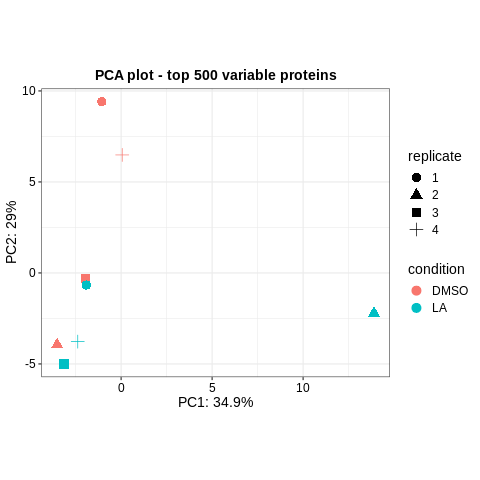

In [ ]:
%%R
pic13_1 <- plot_pca(dep, x = 1, y = 2, n = 500, point_size = 4)
print(pic13_1)

#14 Correlation matrix 

In [ ]:
%%R
colnames(dep)
head(dep)


class: SummarizedExperiment 
dim: 6 8 
metadata(0):
assays(1): ''
rownames(6): Aaas Aacs ... Aars Aars2
rowData names(75): name Protein.IDs ... significant
  DMSO_vs_LA_significant
colnames(8): DMSO_1 DMSO_2 ... LA_3 LA_4
colData names(4): label ID condition replicate


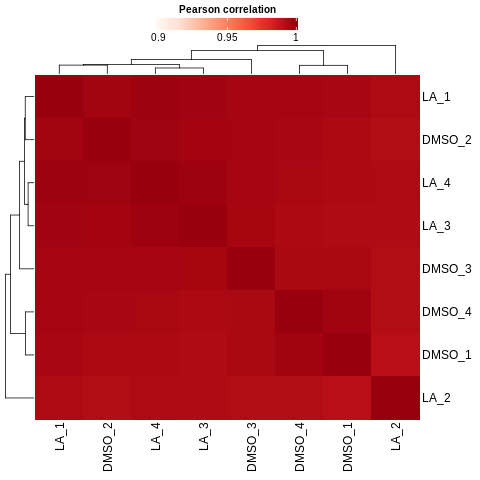

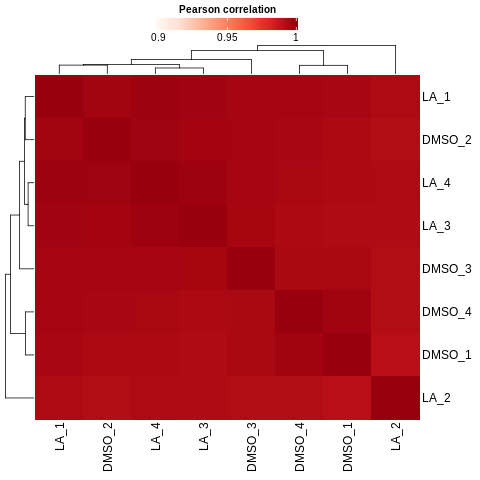

In [ ]:
%%R
# Plot the Pearson correlation matrix
pic14_1 <- plot_cor(dep, significant = FALSE, lower = 0.9, upper = 1, pal = "Reds")
print(pic14_1)

#15 Heatmap of all significant proteins

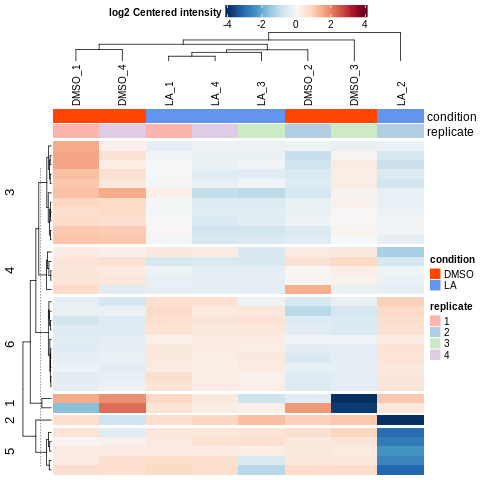

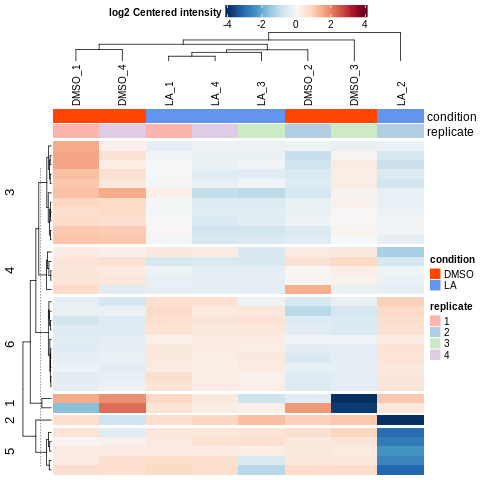

In [ ]:
%%R
# Plot a heatmap of all significant proteins with the data centered per protein
pic15_1 <- plot_heatmap(dep, type = "centered", kmeans = TRUE, 
             k = 6, col_limit = 4, show_row_names = FALSE,
             indicate = c("condition", "replicate"))
print(pic15_1)

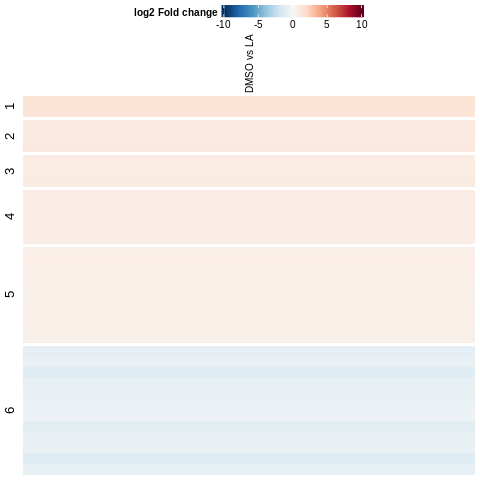

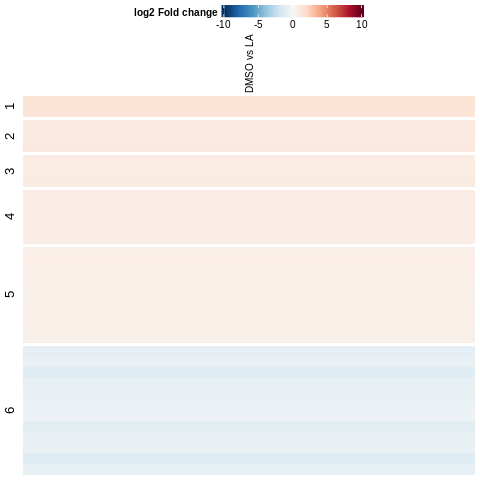

In [ ]:
%%R
# Plot a heatmap of all significant proteins (rows) and the tested contrasts (columns)
pic15_2 <- plot_heatmap(dep, type = "contrast", kmeans = TRUE, 
             k = 6, col_limit = 10, show_row_names = FALSE)
print(pic15_2)

#16 Volcano plots of specific cotrasts 

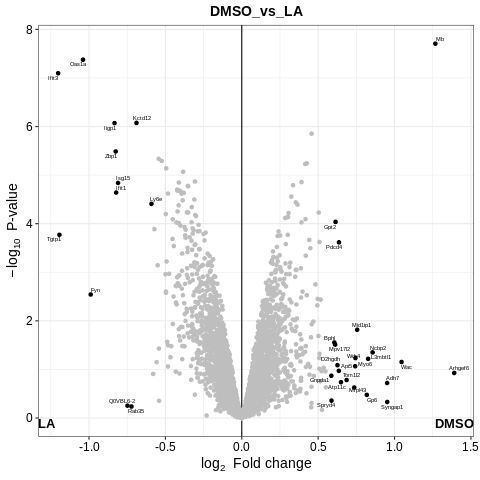

In [ ]:
%%R
# Plot a volcano plot for the contrast "Ubi6 vs Ctrl""
pic16_1 <- plot_volcano(dep, contrast = "DMSO_vs_LA", label_size = 2, add_names = TRUE) #變數
print(pic16_1)

#17 Barplots of a protein of interest 

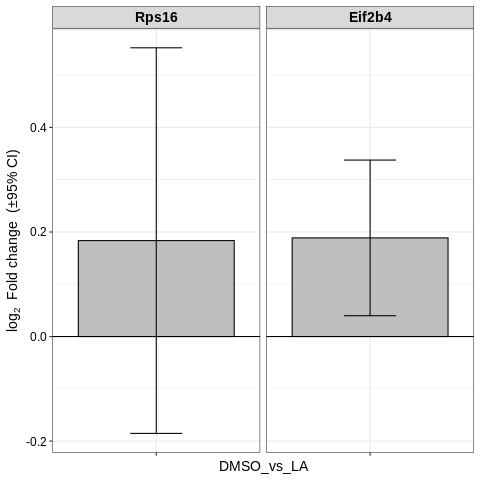

In [ ]:
%%R
# Plot a barplot for USP15 and IKBKG
pic17_1 <- plot_single(dep, proteins = c("Rps16", "Eif2b4"))  #Rps16 Eif2b4要給使用者輸入  #	proteins: Character, The name(s) of the protein(s) to plot.
print(pic17_1)

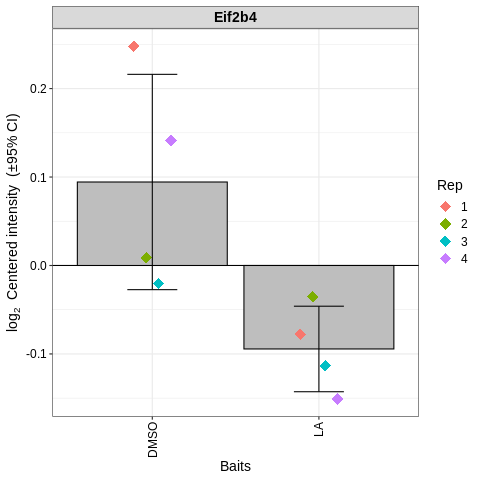

In [ ]:
%%R
# Plot a barplot for the protein USP15 with the data centered
pic17_2 <- plot_single(dep, proteins = "Eif2b4", type = "centered") #要給使用者輸入
print(pic17_2)

#18 Frequency plot of significant proteins and overlap of conditions 



 

In [ ]:
%%R
# Plot a frequency plot of significant proteins for the different conditions
pic18_1 <- plot_cond(dep)
print(pic18_1)

R[write to console]: Error in apply(mat, 1, function(x) { : dim(X) must have a positive length

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In vsnSample(v) :
R[write to console]: 
 
R[write to console]:  69 rows were removed since they contained only NA elements.

R[write to console]: 2: 
R[write to console]: In vsnSample(v) :
R[write to console]: 
 
R[write to console]:  69 rows were removed since they contained only NA elements.

R[write to console]: 3: Removed 69 row(s) containing missing values (geom_path). 

R[write to console]: 4: 
R[write to console]: In knnimp(x, k, maxmiss = rowmax, maxp = maxp) :
R[write to console]: 
 
R[write to console]:  69 rows with more than 90 % entries missing;
 mean imputation used for these rows

R[write to console]: 5: Removed 69 row(s) containing missing values (geom_path). 

R[write to console]: 6: 
R[write to console]: In knnimp(x, k, maxmiss = rowmax, maxp = maxp) :
R[


Error in apply(mat, 1, function(x) { : dim(X) must have a positive length


RInterpreterError: ignored

In [ ]:
%%R
# Generate a results table
data_results <- get_results(dep)

# Number of significant proteins
data_results %>% filter(significant) %>% nrow()

[1] 34


In [ ]:
%%R
# Column names of the results table
colnames(data_results)

[1] "name"                   "ID"                     "DMSO_vs_LA_p.val"      
[4] "DMSO_vs_LA_p.adj"       "significant"            "DMSO_vs_LA_significant"
[7] "DMSO_vs_LA_ratio"       "DMSO_centered"          "LA_centered"           


In [ ]:
%%R
write.csv(data_results,"dep_output.csv", row.names = FALSE, quote=F)

#19 LFQ-based DEP analysis (不確定) 

In [ ]:
%%R
# The data is provided with the package 
data <- read.csv('/content/proteinGroups_mouse_LA.txt', header=TRUE , sep="\t",fileEncoding ="UTF-8")
experimental_design <- read.csv('/content/drive/MyDrive/Colab_Notebooks/exp_design_LA.csv',header=TRUE ,fileEncoding ="UTF-8")


# The wrapper function performs the full analysis
data_results <- LFQ( data, experimental_design, fun = "MinProb", 
            type = "control", control = "LA", 
            #filter = c("significant"),
            name="Gene.names", ids= "Protein.IDs", alpha = 0.05, lfc = 1)

In [ ]:
%%R
# See all objects saved within the results object
names(data_results)

In [ ]:
%%R
# Extract the results table
results_table <- data_results$results

# Number of significant proteins
results_table %>% filter(significant) %>% nrow()

In [ ]:
%%R
# Extract the sign object
full_data <- data_results$dep

# Use the full data to generate a heatmap
pic19_1 <- plot_heatmap(full_data, type = "contrast", kmeans = TRUE, 
             k = 6, col_limit = 4, show_row_names = FALSE)
print(pic19_1)

#DEP data

In [ ]:
#上傳檔案到colab
from google.colab import files
from rpy2.robjects import r
import rpy2.robjects as robjects

file=files.upload()

if (file):
  filename = next(iter(file))
  if (filename.count(".txt") | filename.count(".csv")):  
    r = robjects.r
    r.assign('filename', filename) #將檔案名稱python -> R
  else :
    print("請再次執行此儲存格，並選擇.csv或.txt檔")
#else if ()
else:
  print("請再次執行此儲存格，並選擇一個檔案")

Saving proteinGroups_mouse_LA.txt to proteinGroups_mouse_LA.txt


In [ ]:
%%R
# Loading a package required for data handling
library("dplyr")
library(stringr)

# The data is provided with the package
file_type <- str_extract_all(filename,'\\b(.txt|.csv)\\b') #確認檔案為csv還是txt
if (file_type == ".csv"){
  data <- read.csv(file = filename, header=TRUE  ,fileEncoding ="UTF-8")  
}
else {
   data <- read.csv(file = filename, header=TRUE ,sep="\t" ,fileEncoding ="UTF-8") 
}

cat("file's row * column =", dim(data), "\n")
cat("**colnames: \n")
print(colnames(data))
#print(head(data[,'Reporter.intensity.count.1']))
#data$Reporter.intensity.count.[1:10] = 2^data$Reporter.intensity.count.[1:10]
#data$Reporter.intensity.count[1-10] = 2^data$Reporter.intensity.count[1-10]



if ( "Reverse" %in% names(data) ){
  data <- filter(data, Reverse != "+")  
}
if ( "Potential.contaminant" %in% names(data) ){
  data <- filter(data, Potential.contaminant != "+") 
}
# We filter for contaminant proteins and decoy database hits, which are indicated by "+" in the columns "Potential.contaminants" and "Reverse", respectively. 

print(head(data))

file's row * column = 3920 74 
**colnames: 
 [1] "Protein.IDs"                         
 [2] "Majority.protein.IDs"                
 [3] "Peptide.counts..all."                
 [4] "Peptide.counts..razor.unique."       
 [5] "Peptide.counts..unique."             
 [6] "Protein.names"                       
 [7] "Gene.names"                          
 [8] "Fasta.headers"                       
 [9] "Number.of.proteins"                  
[10] "Peptides"                            
[11] "Razor...unique.peptides"             
[12] "Unique.peptides"                     
[13] "Sequence.coverage...."               
[14] "Unique...razor.sequence.coverage...."
[15] "Unique.sequence.coverage...."        
[16] "Mol..weight..kDa."                   
[17] "Sequence.length"                     
[18] "Sequence.lengths"                    
[19] "Fraction.average"                    
[20] "Fraction.1"                          
[21] "Fraction.2"                          
[22] "Fraction.3"               

In [ ]:
%%R
# Are there any duplicated gene names?
cat('Are there any duplicated gene names? ', data$Gene.names %>% duplicated() %>% any(), "\n")

if ( data$Gene.names %>% duplicated() %>% any() ){
   # Make a table of duplicated gene names
  print(data %>% group_by(Gene.names) %>% summarize(frequency = n()) %>% 
    arrange(desc(frequency)) %>% filter(frequency > 1))
  
  
}
# Make unique names using the annotation in the "Gene.names" column as primary names and the annotation in "Protein.IDs" as name for those that do not have an gene name.
data_unique <- make_unique(data, "Gene.names", "Protein.IDs", delim = ";")


Are there any duplicated gene names?  TRUE 
# A tibble: 21 × 2
   Gene.names frequency
   <chr>          <int>
 1 ""                42
 2 "Cav1"             2
 3 "Cnbp"             2
 4 "Cux1"             2
 5 "Eef1d"            2
 6 "H2-K1"            2
 7 "Hmga1"            2
 8 "Hnrnpa3"          2
 9 "Hnrnpk"           2
10 "Ikbip"            2
# … with 11 more rows


In [ ]:
%%R
# Generate a SummarizedExperiment object using an experimental design
LFQ_columns <- grep("Reporter.intensity.corrected.", colnames(data_unique)) # get LFQ column numbers

#experimental_design <- UbiLength_ExpDesign
experimental_design <- read.csv('/content/drive/MyDrive/Colab_Notebooks/exp_design_LA.csv',header=TRUE ,fileEncoding ="UTF-8")
experimental_design$label = gsub(" ", ".", experimental_design$label)

data_se <- make_se(data_unique, LFQ_columns, experimental_design)
# Generate a SummarizedExperiment object by parsing condition information from the column names
LFQ_columns <- grep("Reporter.intensity.corrected.", colnames(data_unique)) # get LFQ column numbers
data_se_parsed <- make_se_parse(data_unique, LFQ_columns)

# Let's have a look at the SummarizedExperiment object
data_se

class: SummarizedExperiment 
dim: 3818 8 
metadata(0):
assays(1): ''
rownames(3818): Cul4b L3mbtl1 ... Sart1 Itpr2
rowData names(66): Protein.IDs Majority.protein.IDs ... name ID
colnames(8): DMSO_1 DMSO_2 ... LA_3 LA_4
colData names(4): label ID condition replicate


In [ ]:
%%R
plot_frequency(data_se, plot= FALSE)

  samples proteins
1       0       69
2       6        1
3       7        9
4       8     3739


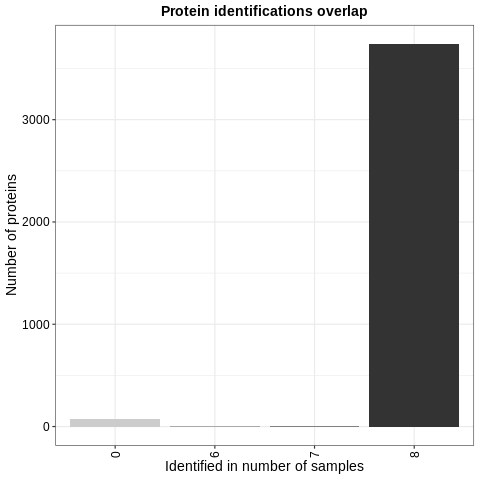

In [ ]:
%%R
# Plot a barplot of the protein identification overlap between samples
pic10_1 <- plot_frequency(data_se, plot= TRUE)
print(pic10_1)

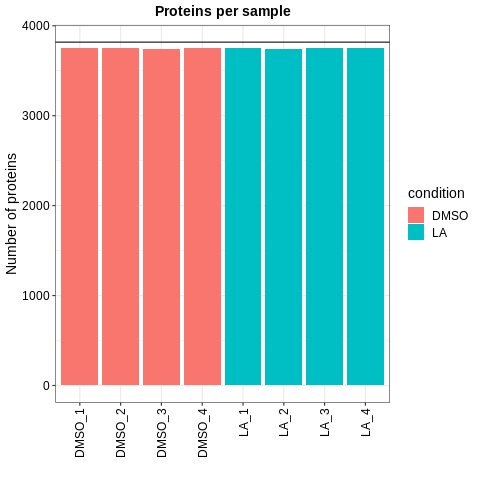

In [ ]:
%%R
# Filter for proteins that are identified in all replicates of at least one condition
data_filt <- filter_missval(data_se, thr = 4) #讓使用者選0~4(重複)

# Less stringent filtering:
# Filter for proteins that are identified in 2 out of 3 replicates of at least one condition
data_filt2 <- filter_missval(data_se, thr = 1)

# Plot a barplot of the number of identified proteins per samples
pic10_2 <- plot_numbers(data_filt, plot=TRUE)
print(pic10_2)

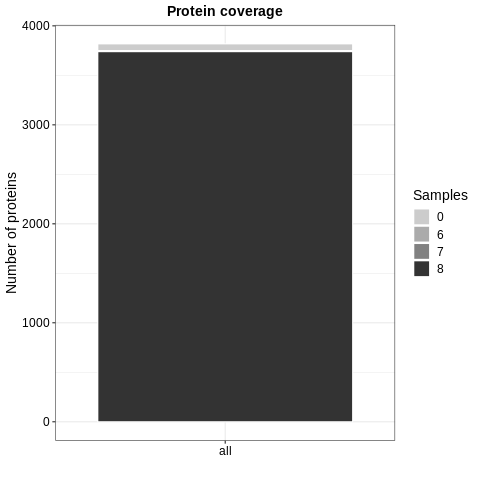

In [ ]:
%%R
# Plot a barplot of the protein identification overlap between samples
pic10_3 <- plot_coverage(data_filt)
print(pic10_3)